In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openmatrix as omx
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp

In [2]:
# Assume you have not changed the relative paths after cloning the repository
root = os.path.dirname(os.path.abspath('.'))
root

'/Users/Shilpa2/Desktop'

In [3]:
# We list all folders available, most of which are TNTP instances
folders = [x for x in os.listdir(root)[1:] if os.path.isdir(os.path.join(root, x))]

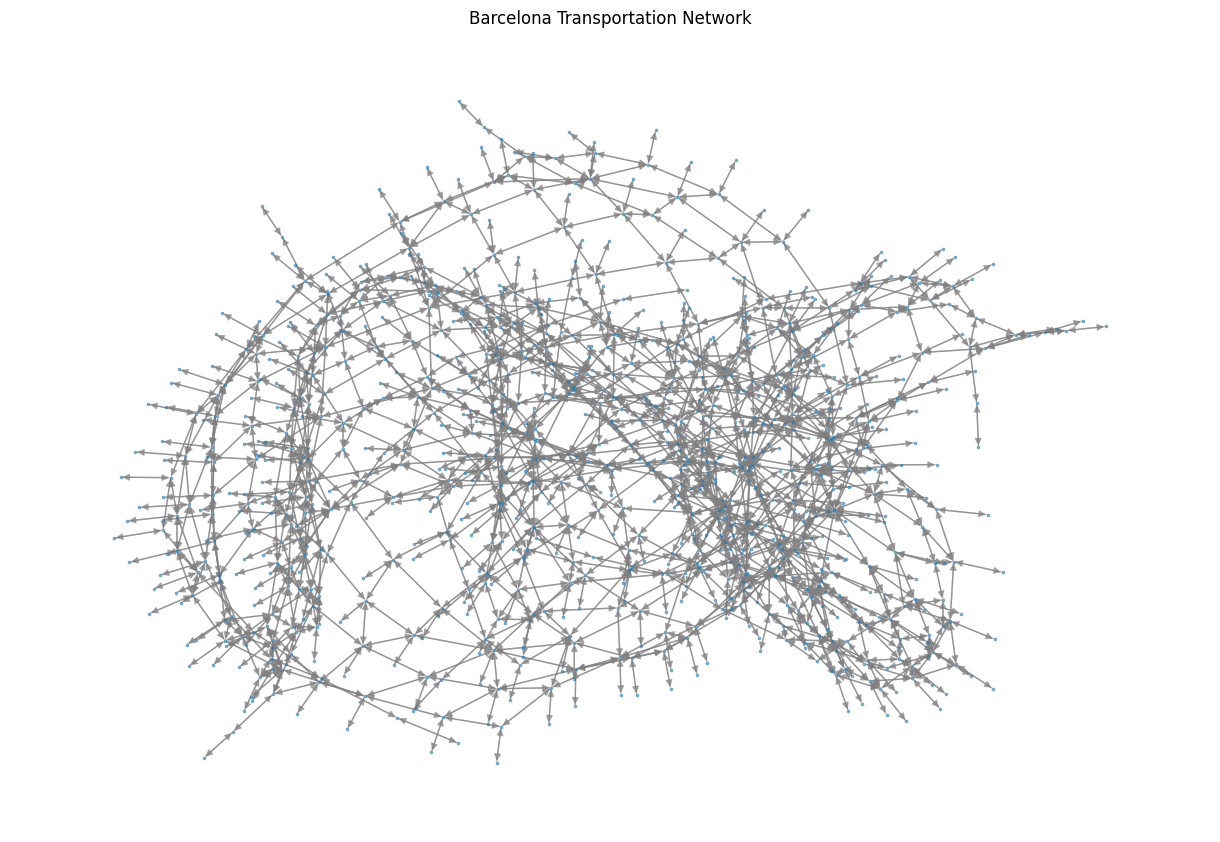

In [2]:
# Load network file
network_file = "ChicagoSketch_net.tntp"
edges = []

reading_data = False  # Flag to start reading data after metadata

with open(network_file, "r") as file:
    for line in file:
        line = line.strip()

        # Start reading only after metadata ends
        if line.startswith("<END OF METADATA>"):
            reading_data = True
            continue  # Skip this line

        if not reading_data or line.startswith("~") or line.startswith("<") or line == "":
            continue  # Skip metadata, headers, and empty lines

        # Split columns and ensure correct number
        parts = line.split()
        if len(parts) >= 11:  # Ensure it has all required columns
            try:
                init_node, term_node = int(parts[0]), int(parts[1])
                capacity, length, free_flow_time = map(float, parts[2:5])
                
                # Add to edge list
                edges.append((init_node, term_node, {
                    "capacity": capacity, "length": length, "fft": free_flow_time
                }))
            except ValueError:
                print(f"Skipping malformed line: {line}")  # Debugging output

# Create directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw(G, node_size=5, edge_color="gray", alpha=0.6, linewidths=0.3)
plt.title("Barcelona Transportation Network")
plt.show()


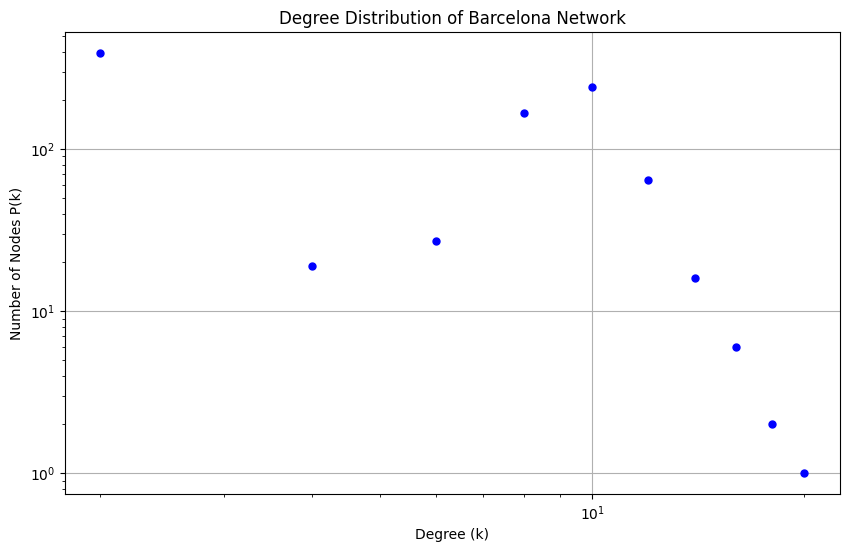

Calculating best minimal value for power law fit
Estimated Power Law Exponent (alpha): 17.139974119436108
Power Law vs. Exponential Fit Test: D = 6.811295693431241, p-value = 5.556911415413798e-07
❌ The network does not strongly follow a power-law.


In [3]:
import powerlaw

# Load the network data
network_file = "ChicagoSketch_net.tntp"
edges = []

reading_data = False

with open(network_file, "r") as file:
    for line in file:
        line = line.strip()

        # Start reading after metadata
        if line.startswith("<END OF METADATA>"):
            reading_data = True
            continue

        if not reading_data or line.startswith("~") or line.startswith("<") or line == "":
            continue

        parts = line.split()
        if len(parts) >= 6:
            init_node, term_node = int(parts[0]), int(parts[1])
            edges.append((init_node, term_node))

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Compute degree distribution
degree_sequence = [G.degree(n) for n in G.nodes()]
degree_counts = np.bincount(degree_sequence)
nonzero_degrees = np.nonzero(degree_counts)[0]  # Remove zero-degree nodes

# Plot Degree Distribution
plt.figure(figsize=(10, 6))
plt.loglog(nonzero_degrees, degree_counts[nonzero_degrees], 'bo', markersize=5)
plt.xlabel("Degree (k)")
plt.ylabel("Number of Nodes P(k)")
plt.title("Degree Distribution of Chicago Network")
plt.grid(True)
plt.show()

# Fit Power Law Distribution
fit = powerlaw.Fit(degree_sequence)
alpha = fit.power_law.alpha
D, p_value = fit.distribution_compare('power_law', 'exponential')

print(f"Estimated Power Law Exponent (alpha): {alpha}")
print(f"Power Law vs. Exponential Fit Test: D = {D}, p-value = {p_value}")

# Interpretation
if p_value > 0.1:
    print("✅ The network is likely scale-free (follows a power-law).")
else:
    print("❌ The network does not strongly follow a power-law.")


In [18]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Download real-world Barcelona road network
G_osm = ox.graph_from_place("Barcelona, Spain", network_type="drive")

# Plot real-world road network
ox.plot_graph(G_osm, figsize=(10, 10), node_size=5, edge_linewidth=0.5)


ModuleNotFoundError: No module named 'osmnx'